# Poverty Post Code

Before this was done, data was preprocessed and merged. For steps on this, see the preprocessing link from the blog.

In [38]:
import pandas as pd # pandas is a data analytics package for python
import matplotlib.pyplot as plt # matplotlib is a graphing package for python
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats
import data_analyzer as analyzer
plt.rcParams['figure.figsize'] = (10.0, 5.0)

## Importing the datasets 

First, import the elementary school dataset. 

In [2]:
df_elem = pd.read_csv('elem_school.csv')
df_elem = df_elem.dropna()
df_elem.head(n=5)

,school_name,test_id,enrollment,charter,f_percent,fr_percent,student_teacher_ratio,student_admin_ratio,avg_exp,avg_yrs_district,dropouts_per_enrollment,susp_per_enrollment,district_budget_per_student,percent_met_and_above
0,A. E. Arnold Elementary,ela,728,False,0.268,0.363,24.266667,728.0,17,15,0,0.0,4606.979762,0.687674
1,A. E. Arnold Elementary,math,728,False,0.268,0.363,24.266667,728.0,17,15,0,0.0,4606.979762,0.620166
2,A. J. Cook Elementary,ela,355,False,0.499,0.643,21.515152,355.0,17,17,0,0.0,5809.952892,0.770904
3,A. J. Cook Elementary,math,355,False,0.499,0.643,21.515152,355.0,17,17,0,0.0,5809.952892,0.777819
4,A. J. Dorsa Elementary,ela,489,False,0.759,0.908,25.076923,489.0,16,13,0,0.0,7096.845521,0.317868


Split up into two categories -- all math and all ela. 

In [3]:
df_elem_math = df_elem[df_elem['test_id'] == 'math']
df_elem_ela = df_elem[df_elem['test_id'] == 'ela']

Repeat for middle school and high school. 

In [4]:
df_middle = pd.read_csv('middle_school.csv')
df_middle = df_middle.dropna()
df_middle.head(n=5)

,school_name,test_id,enrollment,charter,f_percent,fr_percent,student_teacher_ratio,student_admin_ratio,avg_exp,avg_yrs_district,susp_per_enrollment,district_budget_per_student,percent_met_and_above
0,A. G. Currie Middle,ela,776,False,0.832,0.951,23.310303,388.000000,10,6,0.146907,4589.215093,0.370198
1,A. G. Currie Middle,math,776,False,0.832,0.951,23.310303,388.000000,10,6,0.146907,4589.215093,0.172368
2,A. M. Thomas Middle,ela,170,False,0.941,0.959,15.315315,89.473684,14,12,0.000000,6841.925884,0.137706
3,A. M. Thomas Middle,math,170,False,0.941,0.959,15.315315,89.473684,14,12,0.000000,6841.925884,0.092353
4,Abbott Middle,ela,808,False,0.322,0.371,22.088573,808.000000,12,9,0.028465,5244.973988,0.518384


In [5]:
df_middle_math = df_middle[df_middle['test_id'] == 'math']
df_middle_ela = df_middle[df_middle['test_id'] == 'ela']

In [6]:
df_high = pd.read_csv('high_school.csv')
df_high = df_high.dropna()
df_high.head(n=5)

,school_name,test_id,enrollment,charter,f_percent,fr_percent,student_teacher_ratio,student_admin_ratio,avg_exp,avg_yrs_district,dropouts_per_enrollment,susp_per_enrollment,district_budget_per_student,percent_met_and_above
0,Abraham Lincoln High,ela,1903,False,0.460,0.561,21.598002,317.166667,12,9,0,0.034157,4769.215792,0.59
1,Abraham Lincoln High,math,1903,False,0.460,0.561,21.598002,317.166667,12,9,0,0.034157,4769.215792,0.33
2,Abraham Lincoln Senior High,ela,1030,False,0.790,0.903,18.392857,515.000000,19,19,0,0.000000,5587.211817,0.61
3,Abraham Lincoln Senior High,math,1030,False,0.790,0.903,18.392857,515.000000,19,19,0,0.000000,5587.211817,0.33
4,Academies Of Education And Empowerment At Cars...,ela,563,False,0.472,0.612,22.376789,563.000000,16,16,0,0.000000,5587.211817,0.72


In [7]:
df_high_math = df_high[df_high['test_id'] == 'math']
df_high_ela = df_high[df_high['test_id'] == 'ela']

## Graphing school achievement, grouped by FRPM rate

First, let's group the data. 

In [8]:
dataset_names = ['elementary schools', 'middle schools', 'high schools']
ela_dfs = [df_elem_ela, df_middle_ela, df_high_ela]
math_dfs = [df_elem_math, df_middle_math, df_high_math]

def group_frpm(df): 
    "Groups the dataframe by FRPM quartiles"
    df_frgrouped = df.groupby(pd.cut(df['fr_percent'], [0, 0.25, 0.5, 0.75, 1])).mean()
    df_frgrouped.index = ["0-25%", "25-50%", "50-75%", "75-100%"]
    return df_frgrouped

In [9]:
group_frpm(df_elem_ela)

,enrollment,charter,f_percent,fr_percent,student_teacher_ratio,student_admin_ratio,avg_exp,avg_yrs_district,dropouts_per_enrollment,susp_per_enrollment,district_budget_per_student,percent_met_and_above
0-25%,587.790047,0.074650,0.096379,0.123621,21.792468,492.657771,14.480560,11.892691,0.0,0.000898,5050.301149,0.730989
25-50%,543.813505,0.069132,0.292045,0.373810,21.738787,440.916520,14.503215,12.498392,0.0,0.003558,4754.794960,0.569779
50-75%,511.540940,0.056376,0.525236,0.640075,21.136153,443.213101,14.287248,12.499329,0.0,0.008753,4876.404205,0.438656
75-100%,564.316441,0.054803,0.782446,0.879135,21.481800,406.162137,14.128462,12.631703,0.0,0.019635,5156.296178,0.313341


In [10]:
group_frpm(df_middle_ela)

,enrollment,charter,f_percent,fr_percent,student_teacher_ratio,student_admin_ratio,avg_exp,avg_yrs_district,susp_per_enrollment,district_budget_per_student,percent_met_and_above
0-25%,923.928571,0.071429,0.096829,0.125879,22.254337,396.006871,13.457143,10.250000,0.017476,5370.608613,0.736216
25-50%,798.067485,0.134969,0.296534,0.380325,21.986487,368.430911,13.233129,10.619632,0.048215,4525.433064,0.580918
50-75%,749.551220,0.043902,0.507063,0.624317,21.430427,346.922933,12.482927,10.453659,0.085971,5006.648872,0.449708
75-100%,691.108527,0.193798,0.781248,0.881853,20.871647,293.566746,11.408269,9.509044,0.094918,5427.526031,0.316151


In [11]:
group_frpm(df_high_ela)

,enrollment,charter,f_percent,fr_percent,student_teacher_ratio,student_admin_ratio,avg_exp,avg_yrs_district,dropouts_per_enrollment,susp_per_enrollment,district_budget_per_student,percent_met_and_above
0-25%,1621.900000,0.230000,0.112405,0.144620,21.412218,350.322787,12.410000,9.240000,0.0,0.019524,5164.544037,0.743189
25-50%,1261.213166,0.335423,0.295940,0.380549,19.375795,311.057369,12.329154,8.890282,0.0,0.034958,4835.060544,0.611174
50-75%,1278.843750,0.283654,0.507856,0.629096,19.628390,306.125130,12.314904,9.485577,0.0,0.048881,5120.991505,0.528475
75-100%,1091.067834,0.361050,0.755786,0.862070,19.639692,272.368219,10.726477,8.435449,0.0,0.057721,5361.510690,0.440045


Now let's create the bar graphs. 

In [12]:
def grouped_fr_sbac_graph(df_list, dataset_names = dataset_names, title='', xlabel ='', ylabel=''): 
    to_process_dfs = []
    feature = 'percent_met_and_above'
    for df in df_list: 
        to_process_dfs.append(group_frpm(df)[feature])
    df_features = pd.concat(to_process_dfs, axis=1)
    df_features.columns = dataset_names
    df_features.plot.bar()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

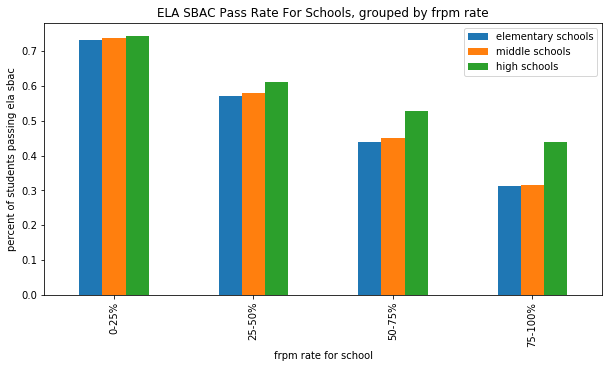

In [13]:
grouped_fr_sbac_graph(ela_dfs, title = "ELA SBAC Pass Rate For Schools, grouped by frpm rate", xlabel = 'frpm rate for school', ylabel = 'percent of students passing ela sbac')

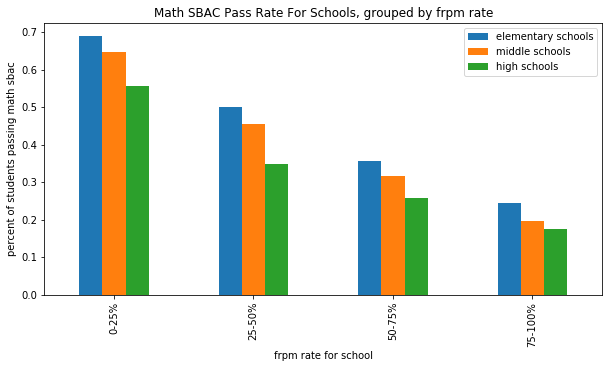

In [14]:
grouped_fr_sbac_graph(math_dfs, title = "Math SBAC Pass Rate For Schools, grouped by frpm rate", xlabel = 'frpm rate for school', ylabel = 'percent of students passing math sbac')

In [41]:
def plot_sbac_frpm_scatter(df, title = '', ylabel = '', xlabel = ''):
    x = df['fr_percent']
    y = df['percent_met_and_above']
    plt.scatter(x, y)
    plt.ylabel('sbac pass rate')
    plt.xlabel('free and reduced lunch percentage')
    plt.title(title)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    p = np.poly1d([slope, intercept])
    plt.plot(x, p(x), "r--")
    print "y=%.6fx+(%.6f)"%(slope,intercept)
    print "r^2", r_value**2
    plt.show()

y=-0.545823x+(0.789656)
r^2 0.681193845533


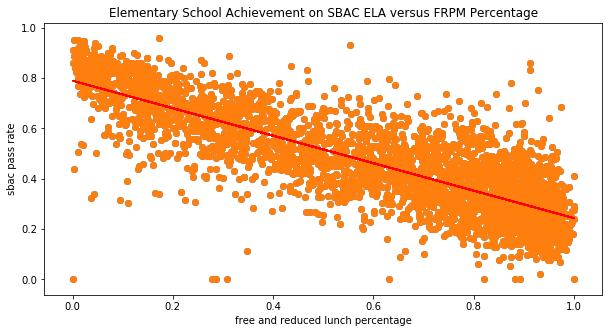

y=-0.548161x+(0.796842)
r^2 0.684655406172


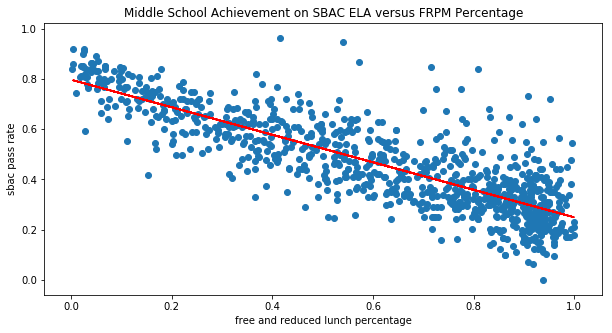

y=-0.382708x+(0.768502)
r^2 0.240372172588


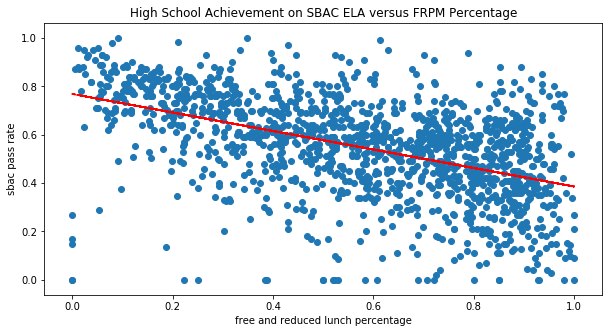

In [42]:
schools = ["Elementary ", "Middle ", "High "]
for i in range(3): 
    plot_sbac_frpm_scatter(ela_dfs[i], title = schools[i] + "School Achievement on SBAC ELA versus FRPM Percentage")

y=-0.573317x+(0.740179)
r^2 0.689341989047


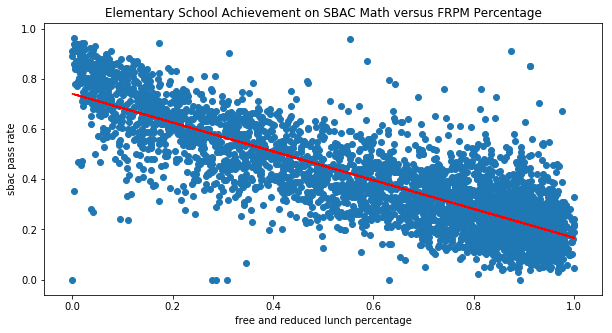

y=-0.576105x+(0.695314)
r^2 0.697561808834


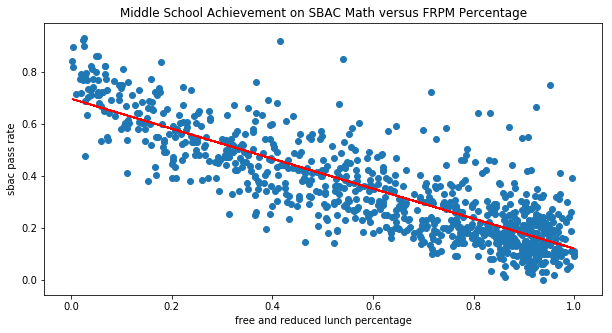

y=-0.461246x+(0.559392)
r^2 0.412315595423


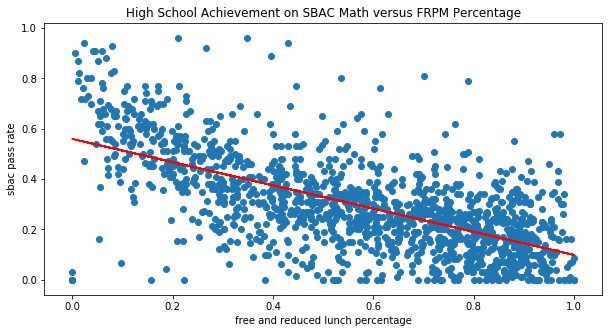

In [43]:
schools = ["Elementary ", "Middle ", "High "]
for i in range(3): 
    plot_sbac_frpm_scatter(math_dfs[i], title = schools[i] + "School Achievement on SBAC Math versus FRPM Percentage")

## Suspension Data

In [61]:
def grouped_fr_sbac_graph(df_list, dataset_names = dataset_names, title='', xlabel ='', ylabel=''): 
    to_process_dfs = []
    feature = 'susp_per_enrollment'
    for df in df_list: 
        to_process_dfs.append(group_frpm(df)[feature])
    df_features = pd.concat(to_process_dfs, axis=1)
    df_features.columns = dataset_names
    ax = df_features.plot.bar()
    df_features.to_csv('suspension_data')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

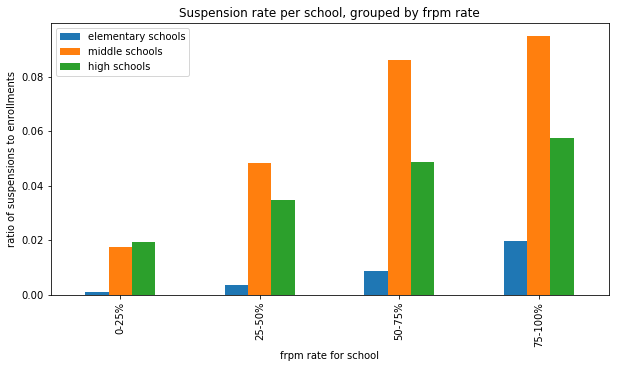

In [64]:
grouped_fr_sbac_graph(ela_dfs, title = "Suspension rate per school, grouped by frpm rate", xlabel = 'frpm rate for school', ylabel = 'ratio of suspensions to enrollments')